In [61]:
from collections import deque

def water_jug_bfs(jug1_capacity, jug2_capacity, target):
    visited = set()
    queue = deque([(0, 0)])  # Initial state (0, 0)
    steps = 0

    while queue:
        steps += 1
        current = queue.popleft()
        if current in visited:
            continue

        visited.add(current)
        j1, j2 = current

        # Check if target is reached
        if j1 == target or j2 == target:
            return True, steps

        # Generate possible states
        states = [
            (jug1_capacity, j2),  # Fill Jug 1
            (j1, jug2_capacity),  # Fill Jug 2
            (0, j2),              # Empty Jug 1
            (j1, 0),              # Empty Jug 2
            (max(0, j1 - (jug2_capacity - j2)), min(jug2_capacity, j2 + j1)),  # Pour Jug 1 -> Jug 2
            (min(jug1_capacity, j1 + j2), max(0, j2 - (jug1_capacity - j1)))   # Pour Jug 2 -> Jug 1
        ]

        for state in states:
            if state not in visited:
                queue.append(state)

    return False, steps

def water_jug_dfs(jug1_capacity, jug2_capacity, target):
    visited = set()
    steps = 0

    def dfs(j1, j2):
        nonlocal steps
        steps += 1

        if (j1, j2) in visited:
            return False

        visited.add((j1, j2))

        # Check if target is reached
        if j1 == target or j2 == target:
            return True

        # Generate possible states
        states = [
            (jug1_capacity, j2),  # Fill Jug 1
            (j1, jug2_capacity),  # Fill Jug 2
            (0, j2),              # Empty Jug 1
            (j1, 0),              # Empty Jug 2
            (max(0, j1 - (jug2_capacity - j2)), min(jug2_capacity, j2 + j1)),  # Pour Jug 1 -> Jug 2
            (min(jug1_capacity, j1 + j2), max(0, j2 - (jug1_capacity - j1)))   # Pour Jug 2 -> Jug 1
        ]

        for state in states:
            if dfs(*state):
                return True

        return False

    result = dfs(0, 0)
    return result, steps

# Example usage
if __name__ == "__main__":
    jug1_capacity = int(input("Enter jug 1 capacity: "))
    jug2_capacity = int(input("Enter jug 2 capacity: "))
    target = int(input("Target Capacity: "))

    if target > max(jug1_capacity, jug2_capacity):
        print("Target capacity cannot be greater than either of the jug's capacities.")
    else:
        bfs_result, bfs_steps = water_jug_bfs(jug1_capacity, jug2_capacity, target)
        print(f"BFS Solution: {bfs_result}, Steps: {bfs_steps}")

        dfs_result, dfs_steps = water_jug_dfs(jug1_capacity, jug2_capacity, target)
        print(f"DFS Solution: {dfs_result}, Steps: {dfs_steps}")


Enter jug 1 capacity:  4
Enter jug 2 capacity:  3
Target Capacity:  2


BFS Solution: True, Steps: 11
DFS Solution: True, Steps: 21


In [62]:
from collections import deque

def missionaries_and_cannibals_bfs():
    start_state = (3, 3, 1)  # (Missionaries on left, Cannibals on left, Boat position: 1 for left, 0 for right)
    goal_state = (0, 0, 0)
    visited = set()
    queue = deque([(start_state, [])])  # State and path

    while queue:
        current_state, path = queue.popleft()

        if current_state in visited:
            continue

        visited.add(current_state)
        missionaries, cannibals, boat = current_state

        # Check if goal state is reached
        if current_state == goal_state:
            return path + [current_state]

        # Generate possible next states
        next_states = generate_next_states(current_state)
        for state in next_states:
            if state not in visited:
                queue.append((state, path + [current_state]))

    return None

def generate_next_states(state):
    missionaries, cannibals, boat = state
    possible_moves = [(1, 0), (0, 1), (1, 1), (2, 0), (0, 2)]  # (Missionaries to move, Cannibals to move)
    next_states = []

    for m, c in possible_moves:
        if boat == 1:  # Boat on the left side
            new_state = (missionaries - m, cannibals - c, 0)
        else:  # Boat on the right side
            new_state = (missionaries + m, cannibals + c, 1)

        if is_valid_state(new_state):
            next_states.append(new_state)

    return next_states

def is_valid_state(state):
    missionaries, cannibals, boat = state

    # Check if numbers are within bounds
    if missionaries < 0 or cannibals < 0 or missionaries > 3 or cannibals > 3:
        return False

    # Check if cannibals outnumber missionaries on either side
    if missionaries > 0 and missionaries < cannibals:
        return False
    if missionaries < 3 and (3 - missionaries) < (3 - cannibals):
        return False

    return True

# Example usage
if __name__ == "__main__":
    solution = missionaries_and_cannibals_bfs()
    if solution:
        print("Solution found:")
        for step in solution:
            print(step)
    else:
        print("No solution exists.")


Solution found:
(3, 3, 1)
(2, 2, 0)
(3, 2, 1)
(3, 0, 0)
(3, 1, 1)
(1, 1, 0)
(2, 2, 1)
(0, 2, 0)
(0, 3, 1)
(0, 1, 0)
(1, 1, 1)
(0, 0, 0)


In [63]:
import heapq

def a_star_search(start_state, goal_state):
    def manhattan_distance(state):
        distance = 0
        for i in range(3):
            for j in range(3):
                value = state[i][j]
                if value != 0:
                    goal_x, goal_y = divmod(value - 1, 3)
                    distance += abs(goal_x - i) + abs(goal_y - j)
        return distance

    def get_neighbors(state):
        neighbors = []
        zero_x, zero_y = [(ix, iy) for ix, row in enumerate(state) for iy, i in enumerate(row) if i == 0][0]
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

        for dx, dy in directions:
            new_x, new_y = zero_x + dx, zero_y + dy
            if 0 <= new_x < 3 and 0 <= new_y < 3:
                new_state = [row[:] for row in state]
                new_state[zero_x][zero_y], new_state[new_x][new_y] = new_state[new_x][new_y], new_state[zero_x][zero_y]
                neighbors.append(new_state)

        return neighbors

    open_set = []
    heapq.heappush(open_set, (manhattan_distance(start_state), 0, start_state, []))  # (f_score, g_score, state, path)
    visited = set()

    while open_set:
        _, g_score, current_state, path = heapq.heappop(open_set)

        if tuple(map(tuple, current_state)) in visited:
            continue

        visited.add(tuple(map(tuple, current_state)))

        if current_state == goal_state:
            return path + [current_state]

        for neighbor in get_neighbors(current_state):
            if tuple(map(tuple, neighbor)) not in visited:
                new_g_score = g_score + 1
                heapq.heappush(open_set, (new_g_score + manhattan_distance(neighbor), new_g_score, neighbor, path + [current_state]))

    return None

# Example usage
if __name__ == "__main__":
    start = [[1, 2, 3], [4, 0, 5], [6, 7, 8]]  # Example starting state
    goal = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]  # Goal state

    solution = a_star_search(start, goal)
    if solution:
        print("Solution found:")
        for step in solution:
            for row in step:
                print(row)
            print()
    else:
        print("No solution exists.")


Solution found:
[1, 2, 3]
[4, 0, 5]
[6, 7, 8]

[1, 2, 3]
[4, 5, 0]
[6, 7, 8]

[1, 2, 3]
[4, 5, 8]
[6, 7, 0]

[1, 2, 3]
[4, 5, 8]
[6, 0, 7]

[1, 2, 3]
[4, 5, 8]
[0, 6, 7]

[1, 2, 3]
[0, 5, 8]
[4, 6, 7]

[1, 2, 3]
[5, 0, 8]
[4, 6, 7]

[1, 2, 3]
[5, 6, 8]
[4, 0, 7]

[1, 2, 3]
[5, 6, 8]
[4, 7, 0]

[1, 2, 3]
[5, 6, 0]
[4, 7, 8]

[1, 2, 3]
[5, 0, 6]
[4, 7, 8]

[1, 2, 3]
[0, 5, 6]
[4, 7, 8]

[1, 2, 3]
[4, 5, 6]
[0, 7, 8]

[1, 2, 3]
[4, 5, 6]
[7, 0, 8]

[1, 2, 3]
[4, 5, 6]
[7, 8, 0]



Moves:
Move disk from A to C
Move disk from A to B
Move disk from C to B
Move disk from A to C
Move disk from B to A
Move disk from B to C
Move disk from A to C


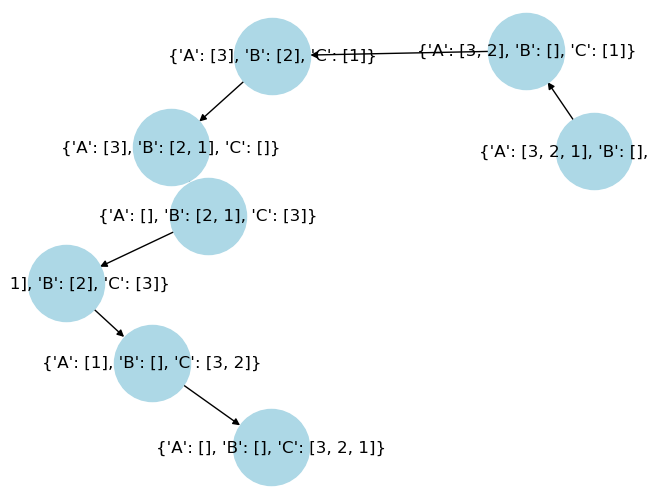

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

def towers_of_hanoi(n, source, target, auxiliary, moves):
    if n == 1:
        moves.append((source, target))
        return
    towers_of_hanoi(n - 1, source, auxiliary, target, moves)
    moves.append((source, target))
    towers_of_hanoi(n - 1, auxiliary, target, source, moves)

def visualize_hanoi(moves, num_disks):
    G = nx.DiGraph()
    current_state = {"A": list(range(num_disks, 0, -1)), "B": [], "C": []}
    G.add_node(str(current_state))

    previous_state = str(current_state)

    for source, target in moves:
        # Move the top disk from the source to the target
        disk = current_state[source].pop()
        current_state[target].append(disk)

        # Sort each tower for consistent state representation
        for key in current_state:
            current_state[key].sort(reverse=True)

        new_state = str(current_state)
        G.add_node(new_state)
        G.add_edge(previous_state, new_state)
        previous_state = new_state

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue")
    plt.show()

if __name__ == "__main__":
    num_disks = 3  # Change this value to solve for more disks
    moves = []

    towers_of_hanoi(num_disks, "A", "C", "B", moves)
    print("Moves:")
    for move in moves:
        print(f"Move disk from {move[0]} to {move[1]}")

    visualize_hanoi(moves, num_disks)


In [77]:
import copy
from itertools import chain

def print_puzzle(state):
    for row in state:
        print(" ".join(str(x).rjust(2) for x in row))
    print()

def find_blank(state):
    for i, row in enumerate(state):
        for j, value in enumerate(row):
            if value == 0:
                return i, j

def is_goal(state, goal):
    return state == goal

def possible_moves(state):
    x, y = find_blank(state)
    moves = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    
    for dx, dy in directions:
        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < 4 and 0 <= new_y < 4:
            new_state = copy.deepcopy(state)
            new_state[x][y], new_state[new_x][new_y] = new_state[new_x][new_y], new_state[x][y]
            moves.append(new_state)
    
    return moves

def iterative_deepening_search(start, goal, max_depth):
    def dls(state, depth):
        if depth == 0 and is_goal(state, goal):
            return [state]
        if depth > 0:
            for move in possible_moves(state):
                path = dls(move, depth - 1)
                if path:
                    return [state] + path
        return None

    for depth in range(max_depth):
        result = dls(start, depth)
        if result:
            return result
    return None

if __name__ == "__main__":
    start_state = [
        [1, 2, 3, 4],
        [5, 0, 7, 8],
        [9, 6, 10, 12],
        [13, 14, 11, 15]
    ]
    goal_state = [
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12],
        [13, 14, 15, 0]
    ]

    print("Start State:")
    print_puzzle(start_state)

    print("Goal State:")
    print_puzzle(goal_state)

    max_depth = 10
    solution = iterative_deepening_search(start_state, goal_state, max_depth)

    if solution:
        print("Solution found:")
        for step in solution:
            print_puzzle(step)
    else:
        print("No solution found within the maximum depth.")


Start State:
 1  2  3  4
 5  0  7  8
 9  6 10 12
13 14 11 15

Goal State:
 1  2  3  4
 5  6  7  8
 9 10 11 12
13 14 15  0

Solution found:
 1  2  3  4
 5  0  7  8
 9  6 10 12
13 14 11 15

 1  2  3  4
 5  6  7  8
 9  0 10 12
13 14 11 15

 1  2  3  4
 5  6  7  8
 9 10  0 12
13 14 11 15

 1  2  3  4
 5  6  7  8
 9 10 11 12
13 14  0 15

 1  2  3  4
 5  6  7  8
 9 10 11 12
13 14 15  0

